This tutorial can be run under `examples` directory of `qsofitmore`. For basics of `PyQSOFit`, see https://github.com/legolason/PyQSOFit/blob/master/example/example.ipynb

### 2.2 Import `QSOFitNew` class from `qsofitmore` 

In [9]:
from qsofitmore import QSOFitNew
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.table import Table

The output path (`path`) should contain a line list file (`qsopar.fits` generated in `1-make_parlist.ipynb`). The output files (including fits table and plots) are stored in `path`. 

In [10]:
path = "./output/"

### 2.3 Initialise an instance of `QSOFitNew` from a custom spectrum 

#### a) From numpy-array like data 
We can read an example spectrum in csv format using `pandas`, and load the data to `QSOFitNew` manually. The data should contain wavelength (in $\AA$), flux and flux error (both in $\rm 10^{-17} erg\;s^{-1}\;cm^{-2}\,\AA^{-1}$). In this example, I have already converted the flux and error to $\rm 10^{-17} erg\;s^{-1}\;cm^{-2}\,\AA^{-1}$. The object of interest is UGC 3374, which has $z=0.02004$, $\rm ra=88.72336906$, and $\rm dec=46.43934051$.

In [47]:
df = pd.read_csv("./data/UGC_3374_ccds.csv")

In [48]:
df

,lam,flux,err
0,3713.125682,575.093933,15.692233
1,3716.174602,595.614136,16.098293
2,3719.223522,583.948425,15.944775
3,3722.272442,596.417175,15.941905
4,3725.321363,599.870239,15.927223
...,...,...,...
1165,7265.117806,399.388733,7.409341
1166,7268.166726,385.701477,7.304856
1167,7271.215646,372.931519,7.231922
1168,7274.264566,395.445251,7.496907


In [39]:
q = QSOFitNew(lam=df.lam, flux=df.flux, err=df.err, 
              z=0.02004, ra=88.72336906, dec=46.43934051,
              name='UGC_3374', is_sdss=False, path=path)

#### a) From IRAF multispec

If you have a spectrum generated by `IRAF`/`PyRAF`, in which case the 4 bands of the fits file are:  
BANDID1 = 'spectrum - background fit, weights variance, clean no'               
BANDID2 = 'raw - background fit, weights none, clean no'                        
BANDID3 = 'background - background fit'                                         
BANDID4 = 'sigma - background fit, weights variance, clean no'  
The first and fourth bands are flux and flux error, respectively, in unit $\rm erg\;s^{-1}\;cm^{-2}\,\AA^{-1}$
You can simply load the data with the classmethod `QSOFitNew.fromiraf`, which does the unit conversion automatically.

In [49]:
q = QSOFitNew.fromiraf("./data/UGC_3374_ccds.fits",redshift=0.02004,telescope='1.3m',path=path)

1170


### 2.4 Fit the spectrum 

#### Choose a dust map (default: sfd map)

In [31]:
q.setmapname("sfd")

If you want to use planck dust map instead, make sure you have installed [`dustmaps`](https://dustmaps.readthedocs.io/en/latest/installation.html) and downloaded the files of planck dust map (see https://dustmaps.readthedocs.io/en/latest/installation.html). Then you can use `q.setmapname("planck")` to choose the planck map.

#### Apply `q.Fit()`  

By default, `QSOFit.Fit()` of `PyQSOFit` does not output derived quantities of narrow lines, including FWHM, sigma, EW, and integrated flux (area); the `q.line_prop()` method should be called to calculate these parameters after fitting.  

In `qsofitmore`, after specifying `MC = True` when calling `q.Fit()`, narrow line properties above are calculated during fitting and are stored in `path + objectname.fits`.

Name is now UGC_3374.
`mapname` for extinction not set.
Setting `mapname` to `sfd`.


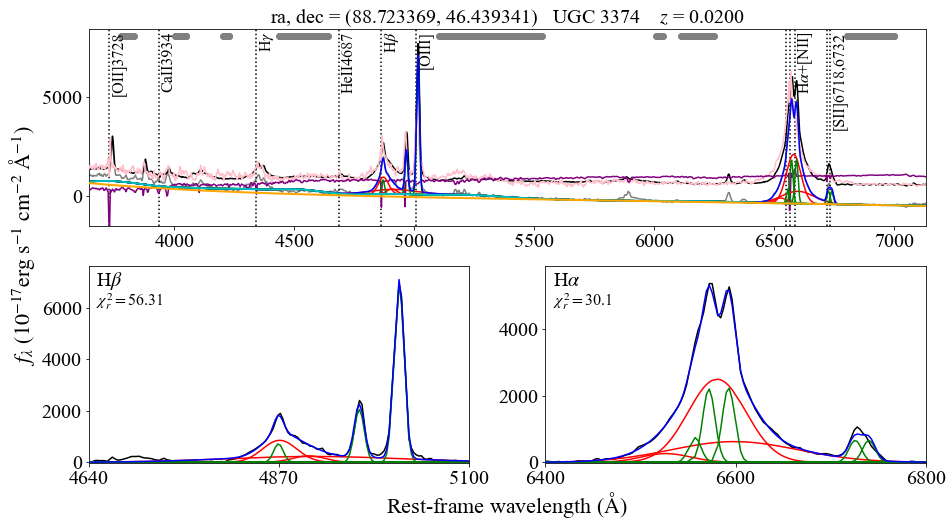

In [51]:
q.Fit(name = None, deredden = True, wave_range = None, wave_mask =None, 
      decomposition_host = True, Mi = None, npca_gal = 5, npca_qso = 20,
      Fe_uv_op = True, poly = True, BC = False, MC = True, n_trails = 20, 
      linefit = True, tie_lambda = True, tie_width = True, 
      tie_flux_1 = True, tie_flux_2 = True,
      save_result = True, plot_fig = True, save_fig = True, 
      plot_line_name = True, plot_legend = False,
      # save_fig_path = figpath, 
      # save_fits_path = respath,
      save_fits_name = None)

#### Print fitting results
Try: 
`q.all_result_name`, `q.all_result`, `q.na_line_result`, `q.conti_result_name`, `q.gauss_result_name`